In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('SoybeanFutures_ZS_CBT.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,956.50,960.00,949.50,955.00,955.00,2900
2018-01-03,956.25,960.50,955.00,959.75,959.75,2582
2018-01-04,959.25,960.00,950.25,959.25,959.25,2133
2018-01-05,960.00,966.50,960.00,961.50,961.50,1278
2018-01-08,960.75,962.25,951.50,958.25,958.25,988
...,...,...,...,...,...,...
2022-12-23,1468.75,1484.00,1466.25,1479.00,1479.00,52836
2022-12-27,1490.00,1516.75,1478.25,1482.25,1482.25,61925
2022-12-28,1483.50,1509.75,1482.75,1506.50,1506.50,42705


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,956.50,960.00,949.50,955.00,955.00,2900,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,956.25,960.50,955.00,959.75,959.75,2582,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,959.25,960.00,950.25,959.25,959.25,2133,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,960.00,966.50,960.00,961.50,961.50,1278,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,960.75,962.25,951.50,958.25,958.25,988,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1468.75,1484.00,1466.25,1479.00,1479.00,52836,22.800000,43.5,1.0,0.137912,9.341758
2022-12-27,1490.00,1516.75,1478.25,1482.25,1482.25,61925,22.661798,36.7,2.7,0.023708,7.328090
2022-12-28,1483.50,1509.75,1482.75,1506.50,1506.50,42705,22.579070,37.6,0.7,0.067294,7.233721


In [6]:
train_data_arg = data_arg[:'2022-12']
test_data_arg = data_arg['2022-12':]

train_data_bra = data_bra[:'2022-12']
test_data_bra = data_bra['2022-12':]

train_data_cal = data_cal[:'2022-12']
test_data_cal = data_cal['2022-12':]

train_data_ill = data_ill[:'2022-12']
test_data_ill = data_ill['2022-12':]

train_data_iow = data_iow[:'2022-12']
test_data_iow = data_iow['2022-12':]

train_data_min = data_min[:'2022-12']
test_data_min = data_min['2022-12':]

train_data_neb = data_neb[:'2022-12']
test_data_neb = data_neb['2022-12':]


In [7]:
train_data_arg.shape

(1236, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

AutoARIMA using weather data

In [10]:
import pmdarima as pm
import matplotlib.pyplot as plt

In [11]:
# Fit the ARIMA model with exogenous variables
model_arg = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_arg, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_arg.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5313.968
Date:                Fri, 07 Apr 2023   AIC                          10643.937
Time:                        22:56:18   BIC                          10684.888
Sample:                             0   HQIC                         10659.341
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.2093      0.280     -0.749      0.454      -0.757       0.339
Mean_Precip        3.2025      6.003      0.534      0.594      -8.563      14.968
Mean_WindSpeed    -0.3096      0.391

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


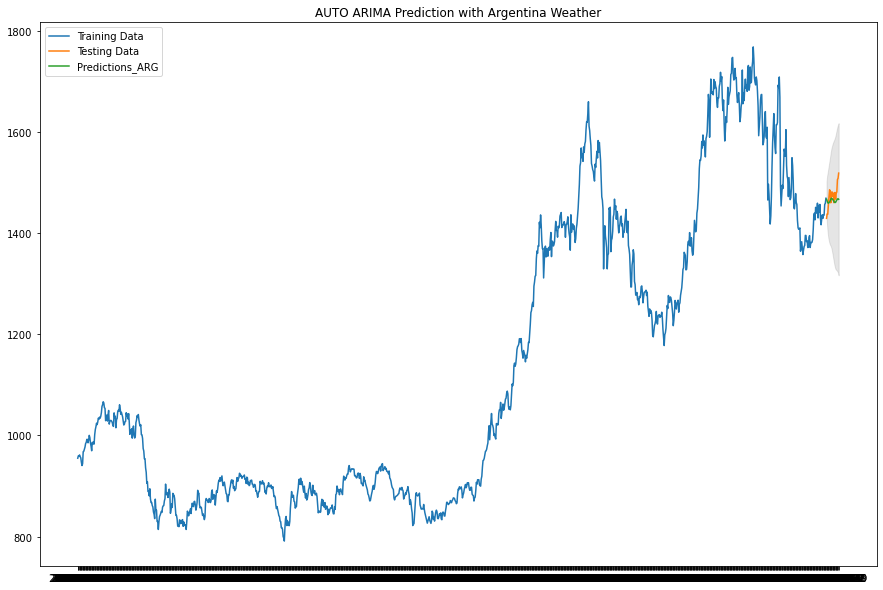

In [12]:
# Forecast
forecast_arg, confint_arg = model_arg.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_arg, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_arg = pd.DataFrame(forecast_arg, index=test_data_arg.index, columns=['Predictions_ARG'])
confint_arg = pd.DataFrame(confint_arg, index=test_data_arg.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')
plt.fill_between(confint_arg.index, confint_arg['Lower_CI'], confint_arg['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Argentina Weather')
plt.show()

In [27]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_arg['Predictions_ARG'])

-0.11399346784195541

In [13]:
# Fit the ARIMA model with exogenous variables for BRA
model_bra = pm.auto_arima(train_data_bra['Close'], exogenous=exog_train_bra, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)
# Print the summary of the model
print(model_bra.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5313.546
Date:                Fri, 07 Apr 2023   AIC                          10643.091
Time:                        22:56:46   BIC                          10684.042
Sample:                             0   HQIC                         10658.495
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.3706      0.495      0.749      0.454      -0.599       1.340
Mean_Precip       43.2999     23.036      1.880      0.060      -1.850      88.450
Mean_WindSpeed    -1.0571      0.949

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


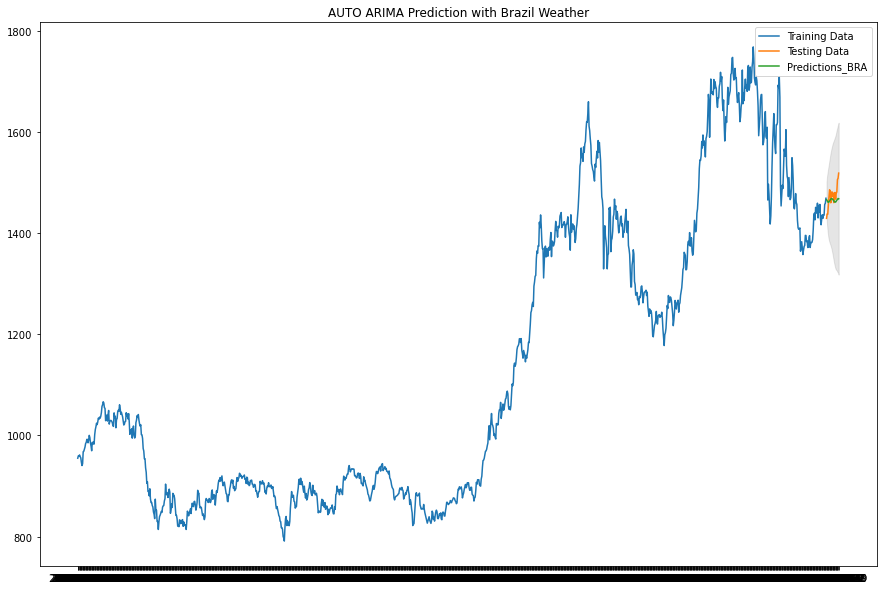

In [14]:
# Forecast for Brazil
forecast_bra, confint_bra = model_bra.predict(n_periods=len(test_data_bra), 
                                               exogenous=exog_test_bra, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for Brazil
pred_bra = pd.DataFrame(forecast_bra, index=test_data_bra.index, columns=['Predictions_BRA'])
confint_bra = pd.DataFrame(confint_bra, index=test_data_bra.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for Brazil
plt.figure(figsize=(15, 10))
plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')
plt.fill_between(confint_bra.index, confint_bra['Lower_CI'], confint_bra['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Brazil Weather')
plt.show()

In [26]:
from sklearn.metrics import r2_score
r2_score(test_data_bra['Close'], pred_bra['Predictions_BRA'])

-0.09040347545016725

In [15]:
# Fit the ARIMA model with exogenous variables for California
model_cal = pm.auto_arima(train_data_cal['Close'], exogenous=exog_train_cal, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model for California
print(model_cal.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1238
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5321.443
Date:                Fri, 07 Apr 2023   AIC                          10658.886
Time:                        22:57:16   BIC                          10699.849
Sample:                             0   HQIC                         10674.293
                               - 1238                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0079      0.342     -0.023      0.982      -0.678       0.662
Mean_Precip        5.6895     10.045      0.566      0.571     -13.998      25.377
Mean_WindSpeed     0.1037      0.449

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


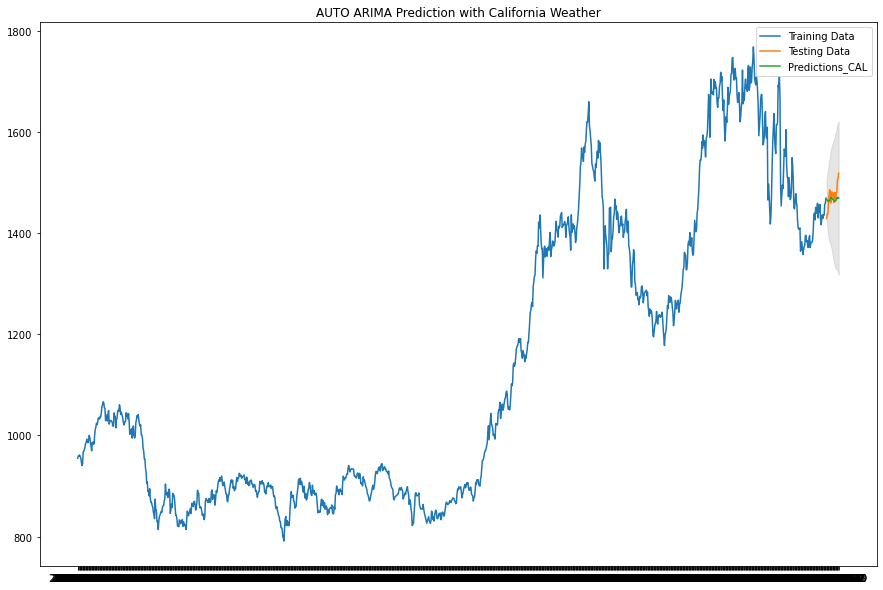

In [16]:
# Forecast for California
forecast_cal, confint_cal = model_cal.predict(n_periods=len(test_data_cal), 
                                               exogenous=exog_test_cal, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for California
pred_cal = pd.DataFrame(forecast_cal, index=test_data_cal.index, columns=['Predictions_CAL'])
confint_cal = pd.DataFrame(confint_cal, index=test_data_cal.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for California
plt.figure(figsize=(15, 10))
plt.plot(train_data_cal.index, train_data_cal['Close'], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')
plt.fill_between(confint_cal.index, confint_cal['Lower_CI'], confint_cal['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with California Weather')
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2_score(test_data_cal['Close'], pred_cal['Predictions_CAL'])

-0.023095420268857803

In [17]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_ill = pm.auto_arima(train_data_ill['Close'], exogenous=exog_train_ill, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_ill.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1238
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5320.967
Date:                Fri, 07 Apr 2023   AIC                          10657.934
Time:                        22:57:46   BIC                          10698.897
Sample:                             0   HQIC                         10673.341
                               - 1238                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0654      0.155     -0.421      0.674      -0.370       0.239
Mean_Precip        2.9878      3.021      0.989      0.323      -2.934       8.909
Mean_WindSpeed    -0.0424      0.231

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


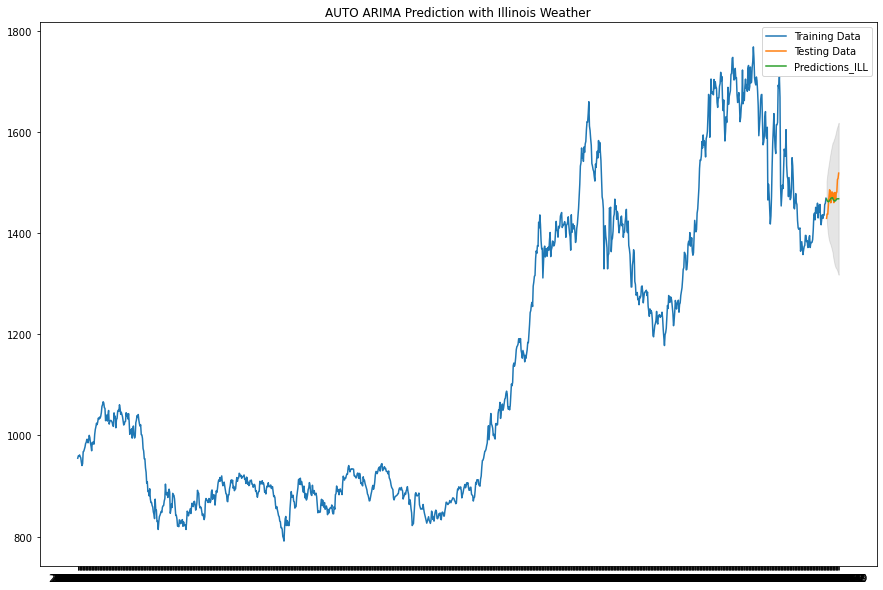

In [18]:
# Forecast
forecast_ill, confint_ill = model_ill.predict(n_periods=len(test_data_ill), 
                                               exogenous=exog_test_ill, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_ill = pd.DataFrame(forecast_ill, index=test_data_ill.index, columns=['Predictions_ILL'])
confint_ill = pd.DataFrame(confint_ill, index=test_data_ill.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')
plt.fill_between(confint_ill.index, confint_ill['Lower_CI'], confint_ill['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Illinois Weather')
plt.show()

In [29]:
from sklearn.metrics import r2_score
r2_score(test_data_ill['Close'], pred_ill['Predictions_ILL'])

-0.050140663470018554

In [19]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_iow = pm.auto_arima(train_data_iow['Close'], exogenous=exog_train_iow, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_iow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1238
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5330.474
Date:                Fri, 07 Apr 2023   AIC                          10668.948
Time:                        22:57:56   BIC                          10689.430
Sample:                             0   HQIC                         10676.652
                               - 1238                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0853      0.139     -0.615      0.539      -0.357       0.187
Mean_Precip       -3.0470      4.904     -0.621      0.534     -12.658       6.564
Mean_WindSpeed    -0.0711      0.178

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


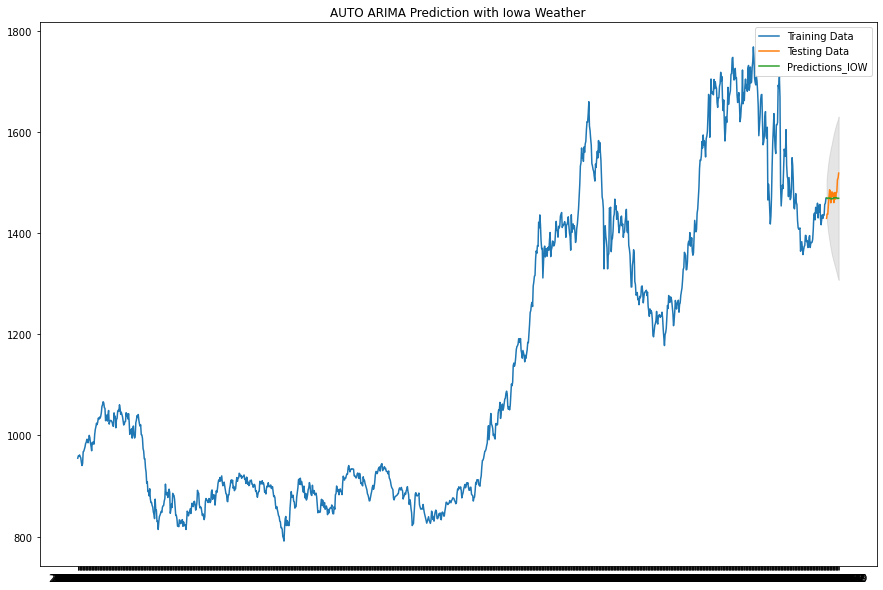

In [20]:
forecast_iow, confint_iow = model_iow.predict(n_periods=len(test_data_iow), 
                                               exogenous=exog_test_iow, return_conf_int=True)

pred_iow = pd.DataFrame(forecast_iow, index=test_data_iow.index, columns=['Predictions_IOW'])
confint_iow = pd.DataFrame(confint_iow, index=test_data_iow.index, columns=['Lower_CI', 'Upper_CI'])

plt.figure(figsize=(15, 10))
plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')
plt.fill_between(confint_iow.index, confint_iow['Lower_CI'], confint_iow['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Iowa Weather')
plt.show()

In [30]:
from sklearn.metrics import r2_score
r2_score(test_data_iow['Close'], pred_iow['Predictions_IOW'])

-0.05863476133442114

In [21]:
# Fit the ARIMA model with exogenous variables
model_min = pm.auto_arima(train_data_min['Close'], exogenous=exog_train_min, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_min.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1238
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5330.858
Date:                Fri, 07 Apr 2023   AIC                          10669.715
Time:                        22:58:07   BIC                          10690.197
Sample:                             0   HQIC                         10677.419
                               - 1238                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.1082      0.150     -0.720      0.472      -0.403       0.186
Mean_Precip       -2.5067      3.965     -0.632      0.527     -10.278       5.265
Mean_WindSpeed     0.0048      0.184

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


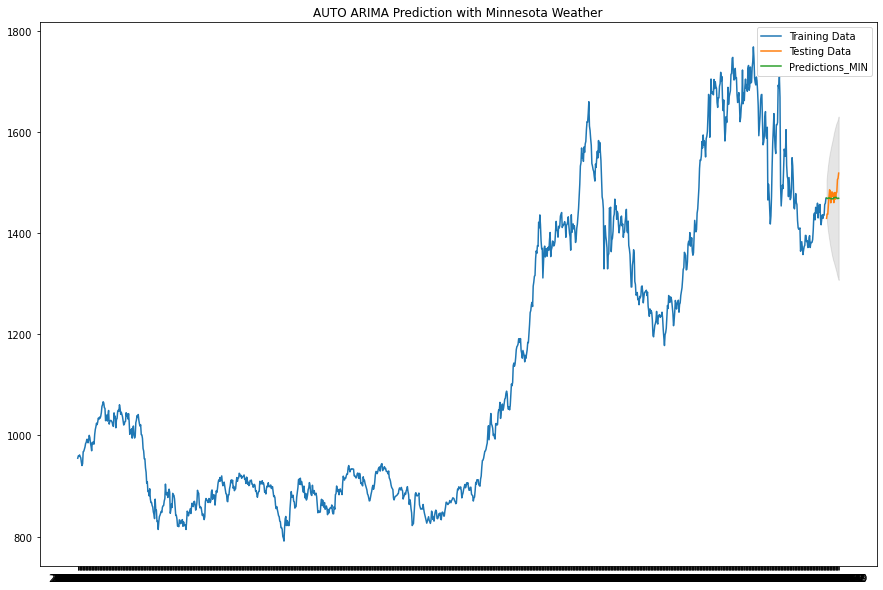

In [22]:
# Forecast
forecast_min, confint_min = model_min.predict(n_periods=len(test_data_min), 
                                               exogenous=exog_test_min, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_min = pd.DataFrame(forecast_min, index=test_data_min.index, columns=['Predictions_MIN'])
confint_min = pd.DataFrame(confint_min, index=test_data_min.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')
plt.fill_between(confint_min.index, confint_min['Lower_CI'], confint_min['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Minnesota Weather')
plt.show()

In [31]:
from sklearn.metrics import r2_score
r2_score(test_data_min['Close'], pred_min['Predictions_MIN'])

-0.054420046129228794

In [23]:
# Fit the ARIMA model with exogenous variables
model_neb = pm.auto_arima(train_data_neb['Close'], exogenous=exog_train_neb, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_neb.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1238
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5330.163
Date:                Fri, 07 Apr 2023   AIC                          10668.325
Time:                        22:58:16   BIC                          10688.807
Sample:                             0   HQIC                         10676.029
                               - 1238                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0272      0.142     -0.191      0.849      -0.306       0.252
Mean_Precip       -5.5832      5.153     -1.083      0.279     -15.683       4.517
Mean_WindSpeed    -0.0158      0.171

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


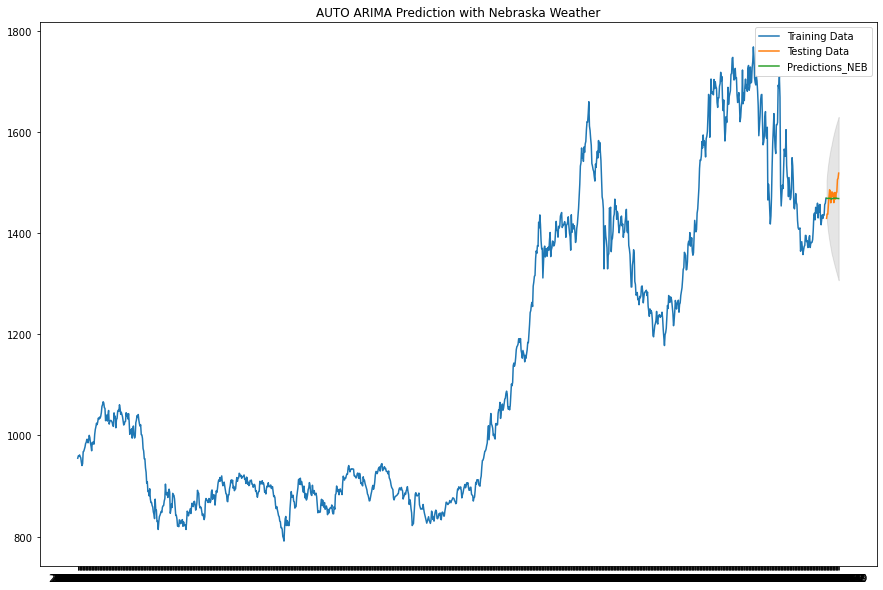

In [24]:
# Forecast
forecast_neb, confint_neb = model_neb.predict(n_periods=len(test_data_neb), 
                                               exogenous=exog_test_neb, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_neb = pd.DataFrame(forecast_neb, index=test_data_neb.index, columns=['Predictions_NEB'])
confint_neb = pd.DataFrame(confint_neb, index=test_data_neb.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')
plt.fill_between(confint_neb.index, confint_neb['Lower_CI'], confint_neb['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Nebraska Weather')
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred_neb['Predictions_NEB'])

-0.06597760334023306

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5309.094
Date:                Fri, 07 Apr 2023   AIC                          10670.188
Time:                        22:59:55   BIC                          10803.278
Sample:                             0   HQIC                         10720.251
                               - 1236                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Mean_Temp_arg         -0.2140      0.323     -0.663      0.507      -0.846       0.418
Mean_Precip_arg        3.7227      6.219      0.599      0.549      -8.466      15.912
Mean_WindSpeed_arg  

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


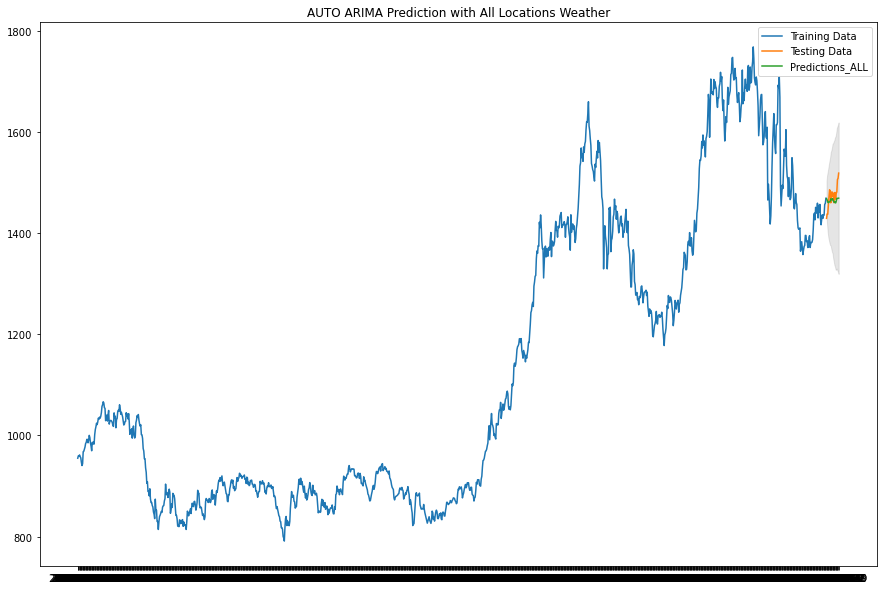

In [25]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)

# Fit the ARIMA model with exogenous variables
model_all = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_all, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_all.summary())

# Forecast
forecast_all, confint_all = model_all.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_all, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_all = pd.DataFrame(forecast_all, index=test_data_arg.index, columns=['Predictions_ALL'])
confint_all = pd.DataFrame(confint_all, index=test_data_arg.index, columns=['Lower_CI_ALL', 'Upper_CI_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_all.index, pred_all['Predictions_ALL'], label='Predictions_ALL')
plt.fill_between(confint_all.index, confint_all['Lower_CI_ALL'], confint_all['Upper_CI_ALL'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with All Locations Weather')
plt.show()

In [33]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_all['Predictions_ALL'])

-0.10564109179283099